In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('amazon_reviews.csv')

In [4]:
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Check the shape of the DataFrame
print(f"Dataset shape: {df.shape}")

Dataset shape: (183531, 3)


In [7]:
# Display the columns and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    183213 non-null  object
 1   review  182702 non-null  object
 2   rating  183531 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB
None


In [8]:
# Get summary statistics for numerical columns
print(df.describe())

              rating
count  183531.000000
mean        4.120448
std         1.285017
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000


In [9]:
# Check for missing values
print(df.isnull().sum())

name      318
review    829
rating      0
dtype: int64


In [10]:
# Remove duplicates if necessary
df = df.drop_duplicates()

In [11]:
# Optionally, remove rows with missing ratings or reviews
df = df.dropna(subset=['review', 'rating'])

In [12]:
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


C:\Users\DELL\AppData\Local\Temp\ipykernel_15124\2889514290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')


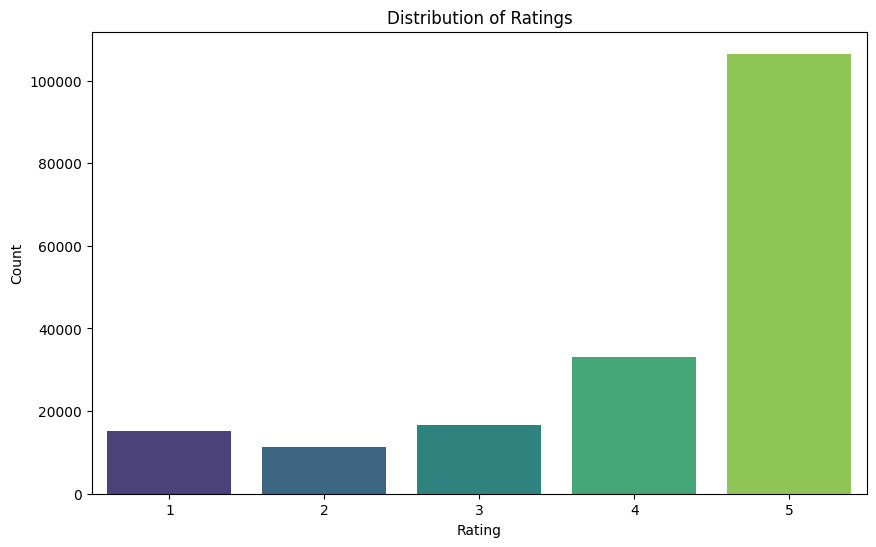

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15124\3308540773.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating.head(10), x='rating', y='name', palette='viridis')


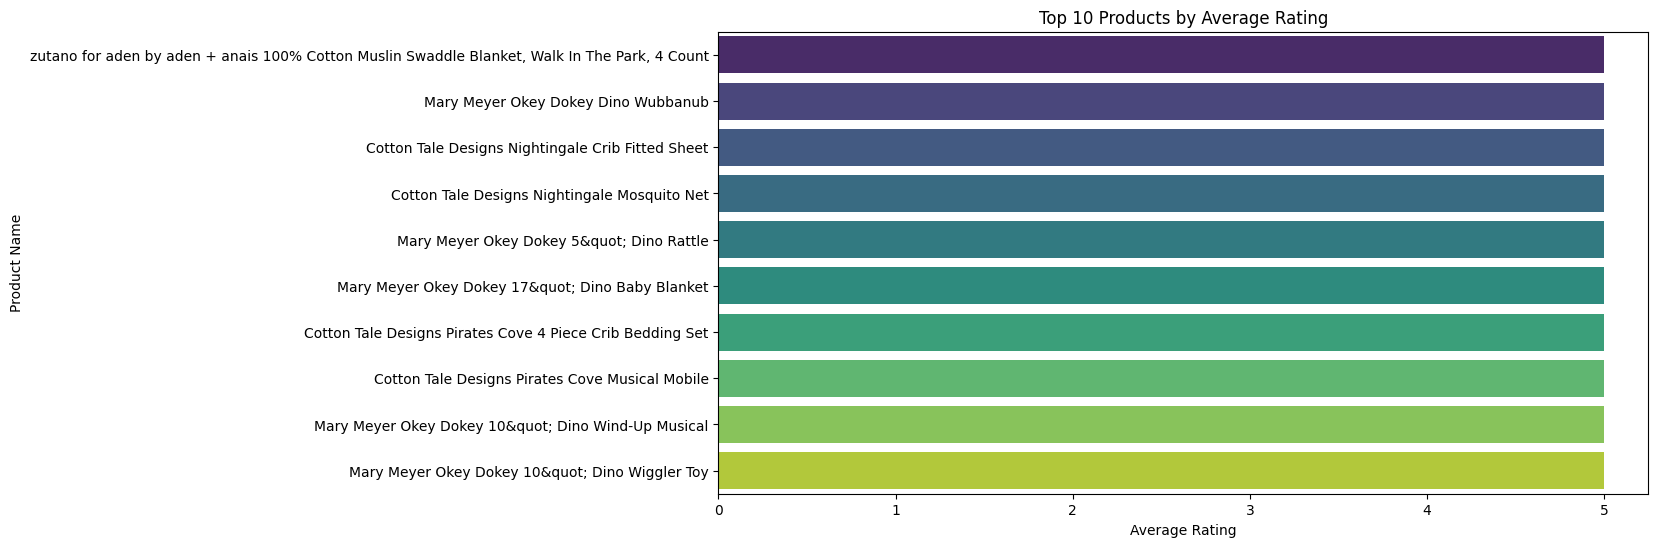

In [14]:
average_rating = df.groupby('name')['rating'].mean().reset_index()
average_rating = average_rating.sort_values(by='rating', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=average_rating.head(10), x='rating', y='name', palette='viridis')
plt.title('Top 10 Products by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.show()

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


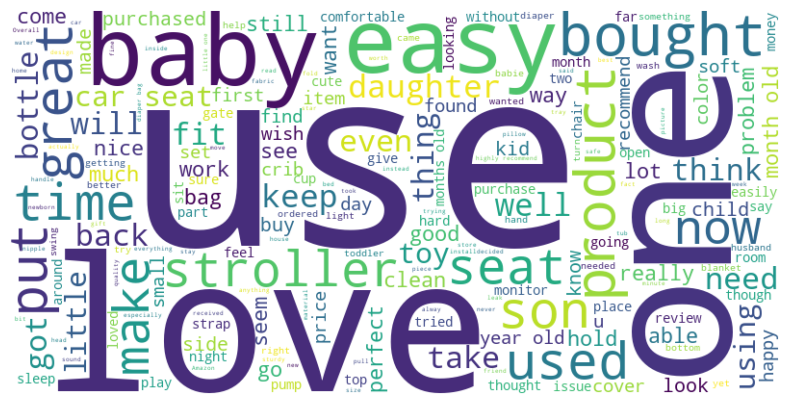

In [16]:
from wordcloud import WordCloud

# Combine all reviews into a single string
all_reviews = ' '.join(df['review'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# Step 2: Sample 30% of the dataset
df_sample = df.sample(frac=0.3, random_state=42)

# Step 3: Create the sentiment column
def classify_sentiment(rating):
    return 1 if rating in [3, 4, 5] else 0  # 1 for positive, 0 for negative

df_sample['sentiments'] = df_sample['rating'].apply(classify_sentiment)

# Step 4: Prepare the data
X = df_sample['review']  # Features (text reviews)
y = df_sample['sentiments']  # Labels (sentiments)

# Step 5: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 6: Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 7: Create a weak classifier (Logistic Regression)
logistic_model = LogisticRegression(max_iter=1000)

# Step 8: Create the Voting Classifier (using only Logistic Regression here)
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model)],
    voting='soft'  # 'soft' voting uses predicted probabilities
)

# Step 9: Train the Voting Classifier
voting_classifier.fit(X_train_vectorized, y_train)

# Step 10: Make predictions
y_pred = voting_classifier.predict(X_test_vectorized)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      1601
           1       0.93      0.96      0.95      9361

    accuracy                           0.91     10962
   macro avg       0.82      0.78      0.80     10962
weighted avg       0.90      0.91      0.90     10962



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [20]:
# Step 2: Sample 30% of the dataset
df_sample = df.sample(frac=0.3, random_state=42)

# Step 3: Create the sentiment column
def classify_sentiment(rating):
    return 1 if rating in [3, 4, 5] else 0  # 1 for positive, 0 for negative

df_sample['sentiments'] = df_sample['rating'].apply(classify_sentiment)

# Step 4: Prepare the data
X = df_sample['review']  # Features (text reviews)
y = df_sample['sentiments']  # Labels (sentiments)

# Step 5: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 7: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Step 8: Create a weak classifier (Logistic Regression)
logistic_model = LogisticRegression(max_iter=1000)

# Step 9: Create the Voting Classifier (using only Logistic Regression here)
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model)],
    voting='soft'  # 'soft' voting uses predicted probabilities
)

# Step 10: Train the Voting Classifier on the resampled data
voting_classifier.fit(X_train_resampled, y_train_resampled)

# Step 11: Make predictions
y_pred = voting_classifier.predict(X_test_vectorized)

# Step 12: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1601
           1       0.94      0.93      0.93      9361

    accuracy                           0.89     10962
   macro avg       0.78      0.80      0.79     10962
weighted avg       0.89      0.89      0.89     10962



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler

In [25]:
# Assuming df is your original DataFrame containing 'review' and 'rating' columns
# Step 2: Sample 30% of the dataset
df_sample = df.sample(frac=0.3, random_state=42)

# Step 3: Create the sentiment column
def classify_sentiment(rating):
    return 1 if rating in [3, 4, 5] else 0  # 1 for positive, 0 for negative

df_sample['sentiments'] = df_sample['rating'].apply(classify_sentiment)

# Step 4: Prepare the data
X = df_sample['review']  # Features (text reviews)
y = df_sample['sentiments']  # Labels (sentiments)

# Step 5: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 7: Apply Random Undersampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_vectorized, y_train)

# Step 8: Create a weak classifier (Logistic Regression)
logistic_model = LogisticRegression(max_iter=1000)

# Step 9: Create the Voting Classifier (using only Logistic Regression here)
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model)],
    voting='soft'  # 'soft' voting uses predicted probabilities
)

# Step 10: Train the Voting Classifier on the resampled data
voting_classifier.fit(X_train_resampled, y_train_resampled)

# Step 11: Make predictions
y_pred = voting_classifier.predict(X_test_vectorized)

# Step 12: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.50      0.85      0.62      1601
           1       0.97      0.85      0.91      9361

    accuracy                           0.85     10962
   macro avg       0.73      0.85      0.77     10962
weighted avg       0.90      0.85      0.87     10962



In [23]:
# Step 7: Create a weak classifier (KNN)
knn_model = KNeighborsClassifier()

# Step 8: Create the Voting Classifier (using only KNN here)
voting_classifier = VotingClassifier(
    estimators=[('knn', knn_model)],
    voting='soft'  # 'soft' voting uses predicted probabilities
)

# Step 9: Train the Voting Classifier
voting_classifier.fit(X_train_vectorized, y_train)

# Step 10: Make predictions
y_pred = voting_classifier.predict(X_test_vectorized)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.56      0.09      0.16      1601
           1       0.86      0.99      0.92      9361

    accuracy                           0.86     10962
   macro avg       0.71      0.54      0.54     10962
weighted avg       0.82      0.86      0.81     10962



In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Assuming df is your original DataFrame containing 'review' and 'rating' columns
# Step 2: Sample 30% of the dataset
df_sample = df.sample(frac=0.3, random_state=42)

# Step 3: Create the sentiment column
def classify_sentiment(rating):
    return 1 if rating in [3, 4, 5] else 0  # 1 for positive, 0 for negative

df_sample['sentiments'] = df_sample['rating'].apply(classify_sentiment)

# Step 4: Prepare the data
X = df_sample['review']  # Features (text reviews)
y = df_sample['sentiments']  # Labels (sentiments)

# Step 5: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 7: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Step 8: Create a weak classifier (KNN)
knn_model = KNeighborsClassifier()

# Step 9: Create the Voting Classifier (using only KNN here)
voting_classifier = VotingClassifier(
    estimators=[('knn', knn_model)],
    voting='soft'  # 'soft' voting uses predicted probabilities
)

# Step 10: Train the Voting Classifier on the resampled data
voting_classifier.fit(X_train_resampled, y_train_resampled)

# Step 11: Make predictions
y_pred = voting_classifier.predict(X_test_vectorized)

# Step 12: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.16
              precision    recall  f1-score   support

           0       0.15      1.00      0.26      1601
           1       0.98      0.02      0.04      9361

    accuracy                           0.16     10962
   macro avg       0.56      0.51      0.15     10962
weighted avg       0.86      0.16      0.07     10962



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Step 7: Create a weak classifier (Naive Bayes)
naive_bayes_model = MultinomialNB()

# Step 8: Create a Bagging Classifier using Naive Bayes as the estimator
bagging_classifier = BaggingClassifier(estimator=naive_bayes_model, n_estimators=10, random_state=42)

# Step 9: Train the Bagging Classifier
bagging_classifier.fit(X_train_vectorized, y_train)

# Step 10: Make predictions
y_pred = bagging_classifier.predict(X_test_vectorized)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.67      0.54      0.60      1601
           1       0.92      0.95      0.94      9361

    accuracy                           0.89     10962
   macro avg       0.80      0.75      0.77     10962
weighted avg       0.89      0.89      0.89     10962



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Assuming df is your original DataFrame containing 'review' and 'rating' columns
# Step 1: Sample 30% of the dataset
df_sample = df.sample(frac=0.3, random_state=42)

# Step 2: Create the sentiment column
def classify_sentiment(rating):
    return 1 if rating in [3, 4, 5] else 0  # 1 for positive, 0 for negative

df_sample['sentiments'] = df_sample['rating'].apply(classify_sentiment)

# Step 3: Prepare the data
X = df_sample['review']  # Features (text reviews)
y = df_sample['sentiments']  # Labels (sentiments)

# Step 4: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 6: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Step 7: Create a weak classifier (Naive Bayes)
naive_bayes_model = MultinomialNB()

# Step 8: Create the Voting Classifier (using only Naive Bayes here)
voting_classifier = VotingClassifier(
    estimators=[('naive_bayes', naive_bayes_model)],
    voting='soft'  # 'soft' voting uses predicted probabilities
)

# Step 9: Train the Voting Classifier on the resampled data
voting_classifier.fit(X_train_resampled, y_train_resampled)

# Step 10: Make predictions
y_pred = voting_classifier.predict(X_test_vectorized)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.66      0.43      0.52      1601
           1       0.91      0.96      0.93      9361

    accuracy                           0.88     10962
   macro avg       0.78      0.70      0.73     10962
weighted avg       0.87      0.88      0.87     10962



In [28]:
# Step 7: Create weak classifiers
knn_model = KNeighborsClassifier(n_neighbors=5)
naive_bayes_model = MultinomialNB()
logistic_regression_model = LogisticRegression(max_iter=1000)

# Step 8: Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('knn', knn_model),
        ('naive_bayes', naive_bayes_model),
        ('logistic_regression', logistic_regression_model)
    ],
    voting='hard'  # or 'soft' for probability-based voting
)

# Step 9: Train the Voting Classifier
voting_classifier.fit(X_train_vectorized, y_train)

# Step 10: Make predictions
y_pred = voting_classifier.predict(X_test_vectorized)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.78      0.47      0.59      1601
           1       0.92      0.98      0.95      9361

    accuracy                           0.90     10962
   macro avg       0.85      0.73      0.77     10962
weighted avg       0.90      0.90      0.89     10962



In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Assuming df is your original DataFrame containing 'review' and 'rating' columns
# Step 1: Sample 30% of the dataset
df_sample = df.sample(frac=0.3, random_state=42)

# Step 2: Create the sentiment column
def classify_sentiment(rating):
    return 1 if rating in [3, 4, 5] else 0  # 1 for positive, 0 for negative

df_sample['sentiments'] = df_sample['rating'].apply(classify_sentiment)

# Step 3: Prepare the data
X = df_sample['review']  # Features (text reviews)
y = df_sample['sentiments']  # Labels (sentiments)

# Step 4: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 6: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Step 7: Create weak classifiers
logistic_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier()
naive_bayes_model = MultinomialNB()

# Step 8: Create the Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('logistic', logistic_model),
        ('knn', knn_model),
        ('naive_bayes', naive_bayes_model)
    ],
    voting='soft'  # 'soft' voting uses predicted probabilities
)

# Step 9: Train the Voting Classifier on the resampled data
voting_classifier.fit(X_train_resampled, y_train_resampled)

# Step 10: Make predictions
y_pred = voting_classifier.predict(X_test_vectorized)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.55      0.73      0.63      1601
           1       0.95      0.90      0.92      9361

    accuracy                           0.87     10962
   macro avg       0.75      0.81      0.78     10962
weighted avg       0.89      0.87      0.88     10962

